In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []

In [1]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

NameError: name 'coordinates' is not defined

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | sur
Processing Record 4 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 1 | mata de sao joao
Processing Record 6 of Set 1 | requena
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | umm durman
City not found. Skipping...
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | manicore
Processing Record 16 of Set 1 | vanavara
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | rungata
City not found. Skipping...
Processing Record 20 of Set 1 | mar del plata
Proce

Processing Record 34 of Set 4 | taksimo
Processing Record 35 of Set 4 | pevek
Processing Record 36 of Set 4 | agadir
Processing Record 37 of Set 4 | saint george
Processing Record 38 of Set 4 | mabaruma
Processing Record 39 of Set 4 | shaoyang
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | george town
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | nalut
Processing Record 46 of Set 4 | tabas
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | zeya
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | pokaran
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | warri
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | tainan
Processing Record 5 of Set 5 | marsh harbour
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | yekaterinoslavka
Processing Record 8 o

Processing Record 21 of Set 8 | luziania
Processing Record 22 of Set 8 | maine-soroa
Processing Record 23 of Set 8 | longyearbyen
Processing Record 24 of Set 8 | lagoa
Processing Record 25 of Set 8 | miercurea sibiului
Processing Record 26 of Set 8 | mogoytuy
Processing Record 27 of Set 8 | panacan
Processing Record 28 of Set 8 | zverinogolovskoye
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | mineiros
Processing Record 31 of Set 8 | gorokhovets
Processing Record 32 of Set 8 | djambala
Processing Record 33 of Set 8 | road town
Processing Record 34 of Set 8 | jacareacanga
Processing Record 35 of Set 8 | kemijarvi
Processing Record 36 of Set 8 | seoul
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | lisakovsk
Processing Record 39 of Set 8 | ginda
Processing Record 40 of Set 8 | plettenberg bay
Processing Record 41 of Set 8 | guerrero negro
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | viedma
Processing R

City not found. Skipping...
Processing Record 10 of Set 12 | kinshasa
Processing Record 11 of Set 12 | severnyy
Processing Record 12 of Set 12 | vadlapudi
Processing Record 13 of Set 12 | gardelegen
Processing Record 14 of Set 12 | eureka
Processing Record 15 of Set 12 | naze
Processing Record 16 of Set 12 | lerik
Processing Record 17 of Set 12 | laurel
Processing Record 18 of Set 12 | trelew
Processing Record 19 of Set 12 | mittagong
Processing Record 20 of Set 12 | melioratorov
Processing Record 21 of Set 12 | fuquay-varina
Processing Record 22 of Set 12 | beringovskiy
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | lunenburg
Processing Record 25 of Set 12 | san rafael
Processing Record 26 of Set 12 | shangrao
Processing Record 27 of Set 12 | necochea
Processing Record 28 of Set 12 | sturgeon bay
Processing Record 29 of Set 12 | constancia
Processing Record 30 of Set 12 | ndola
Processing Record 31 of Set 12 | villamontes
Processing Record 32 of Set 12 | nieuw

In [13]:
len(city_data)

585

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.49,80,81,17.65,PF,2021-10-28 21:05:15
1,Sur,22.5667,59.5289,77.50,67,0,2.51,OM,2021-10-28 21:06:41
2,Petropavlovsk-Kamchatskiy,53.0452,158.6483,30.79,93,75,4.47,RU,2021-10-28 21:03:19
3,Mata De Sao Joao,-12.5303,-38.2992,73.15,86,6,4.45,BR,2021-10-28 21:06:42
4,Requena,39.4883,-1.1004,55.71,88,95,2.44,ES,2021-10-28 21:06:42
5,Punta Arenas,-53.1500,-70.9167,60.91,51,90,20.71,CL,2021-10-28 21:04:51
6,Yellowknife,62.4560,-114.3525,36.41,99,100,2.62,CA,2021-10-28 21:06:42
7,Constitucion,-35.3333,-72.4167,64.98,59,10,17.00,CL,2021-10-28 21:06:43
8,Kapaa,22.0752,-159.3190,82.38,89,75,3.00,US,2021-10-28 21:06:43
9,Jamestown,42.0970,-79.2353,64.04,59,1,8.05,US,2021-10-28 21:03:58


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-10-28 21:05:15,-23.1203,-134.9692,75.49,80,81,17.65
1,Sur,OM,2021-10-28 21:06:41,22.5667,59.5289,77.50,67,0,2.51
2,Petropavlovsk-Kamchatskiy,RU,2021-10-28 21:03:19,53.0452,158.6483,30.79,93,75,4.47
3,Mata De Sao Joao,BR,2021-10-28 21:06:42,-12.5303,-38.2992,73.15,86,6,4.45
4,Requena,ES,2021-10-28 21:06:42,39.4883,-1.1004,55.71,88,95,2.44
5,Punta Arenas,CL,2021-10-28 21:04:51,-53.1500,-70.9167,60.91,51,90,20.71
6,Yellowknife,CA,2021-10-28 21:06:42,62.4560,-114.3525,36.41,99,100,2.62
7,Constitucion,CL,2021-10-28 21:06:43,-35.3333,-72.4167,64.98,59,10,17.00
8,Kapaa,US,2021-10-28 21:06:43,22.0752,-159.3190,82.38,89,75,3.00
9,Jamestown,US,2021-10-28 21:03:58,42.0970,-79.2353,64.04,59,1,8.05


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

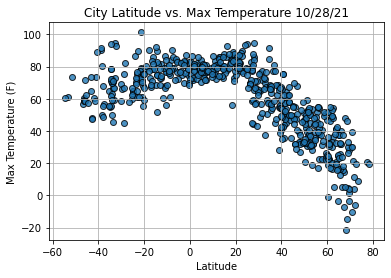

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temp.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png", facecolor = "w")

# Show plot.
plt.show()

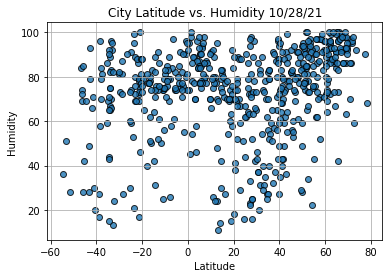

In [29]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png",facecolor = "w")

# Show plot.
plt.show()

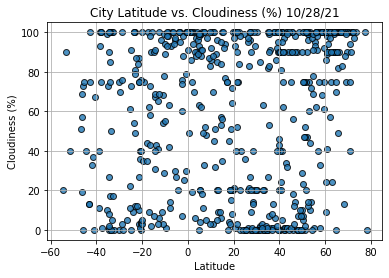

In [30]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png",facecolor = "w")

# Show plot.
plt.show()

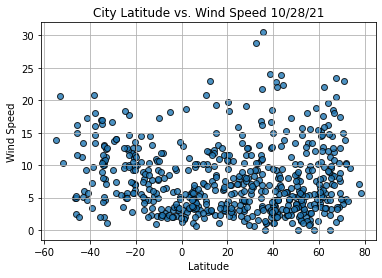

In [31]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png", facecolor = "w")

# Show plot.
plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [34]:
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sur,OM,2021-10-28 21:06:41,22.5667,59.5289,77.50,67,0,2.51
2,Petropavlovsk-Kamchatskiy,RU,2021-10-28 21:03:19,53.0452,158.6483,30.79,93,75,4.47
4,Requena,ES,2021-10-28 21:06:42,39.4883,-1.1004,55.71,88,95,2.44
6,Yellowknife,CA,2021-10-28 21:06:42,62.4560,-114.3525,36.41,99,100,2.62
8,Kapaa,US,2021-10-28 21:06:43,22.0752,-159.3190,82.38,89,75,3.00
9,Jamestown,US,2021-10-28 21:03:58,42.0970,-79.2353,64.04,59,1,8.05
10,Clyde River,CA,2021-10-28 21:06:44,70.4692,-68.5914,29.84,95,100,4.54
11,Victoria,HK,2021-10-28 21:05:03,22.2855,114.1577,77.38,88,84,1.99
13,Vanavara,RU,2021-10-28 21:06:44,60.3400,102.2797,18.63,80,9,4.85
14,Qaanaaq,GL,2021-10-28 21:05:17,77.4840,-69.3632,20.70,90,100,7.02


In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

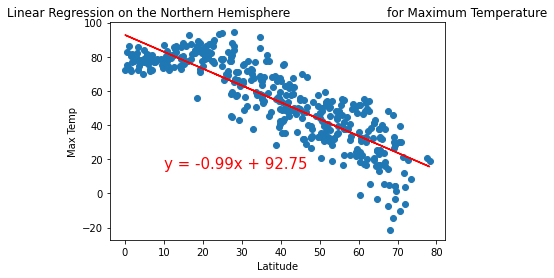

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,15))

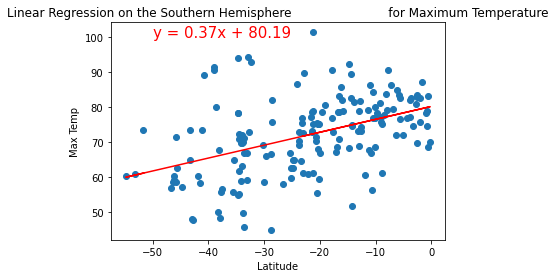

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,100))

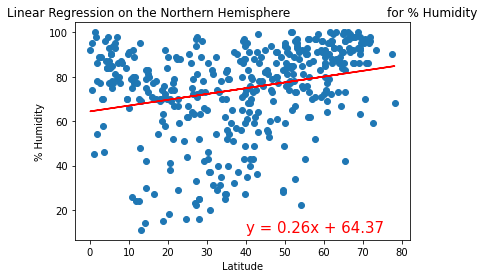

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

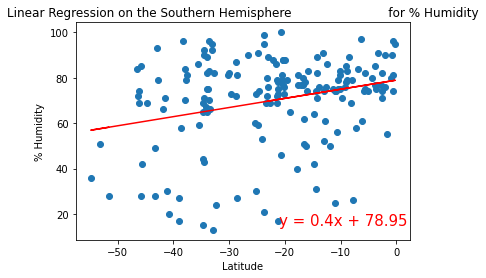

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-21,15))

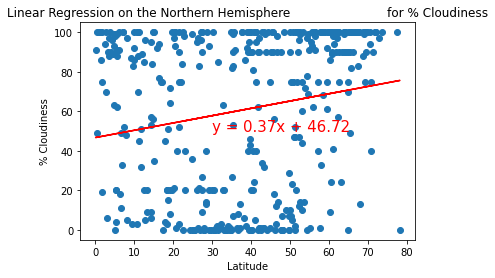

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,50))

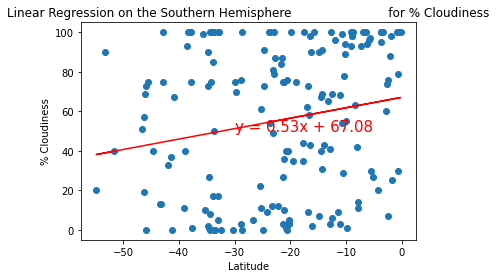

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-30,50))

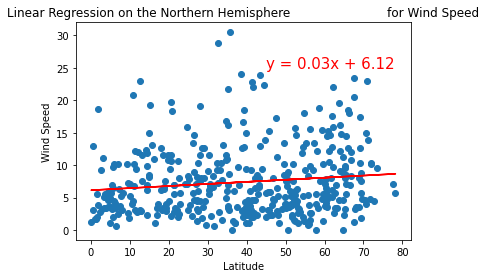

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,25))

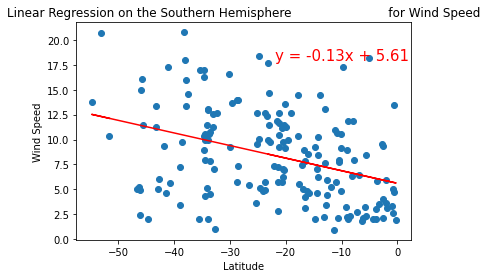

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,18))